## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

Before beginning to create the main program, I import relevant packages needed to run the code: Pandas to read and store the data, several from the easy-to-use ML library sklearn to seperate the data into train-test sets, form a model, calculate an r2 score for evaluation, scale the values, seaborn to visualize the correlation, etc.

## Extracting and Examining Data

In [9]:
dfi = pd.read_csv("kc_house_data.csv")
dfi.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We store the data in the csv file into a pandas DataFrame variable, then use the head() method to display the first 5 rows of that dataset, alloting us to have a look at how the data is arranged.

### Data metrics

In [6]:
columns = dfi.columns
column_count = len(dfi.columns)
data_point_count = len(dfi)

print(
    "There are", 
    data_point_count, 
    "data points in our dataset and each has", 
    column_count, 
    "characteristics. These are, in order of their respective columns: " + ", ".join(columns) + "."
)

There are 21613 data points in our dataset and each has 21 characteristics. These are, in order of their respective columns: id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15.


## Preparing the Data

### Null values

In [7]:
dfi.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We sort the number of null or empty values under each column to handle them if necessary - turns out, there are none in our dataset.

### Feature Selection and Preprocessing

#### Pearson Correlation Matrix

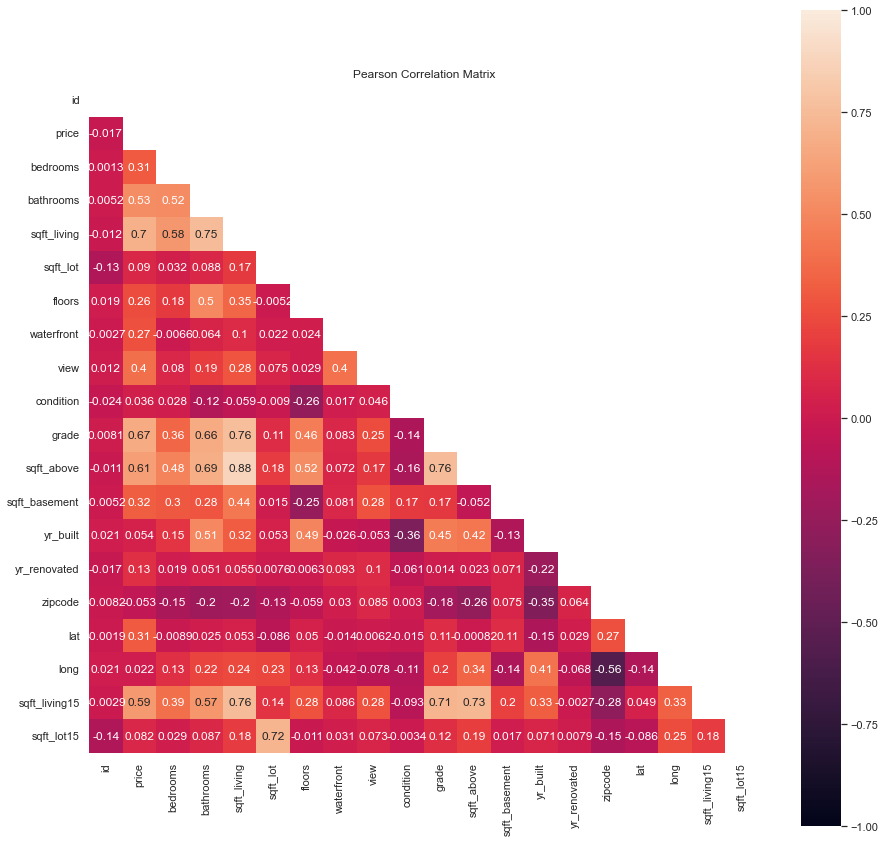

In [11]:
sns.set(rc = {"figure.figsize" : (15, 15)})
# Set an increased plot size to be able to see the values within the boxes
co_corr = dfi.corr(method = "pearson")
# co_corr stores the correlation coefficient for pairs of features in dfi
mask = np.zeros_like(co_corr)
mask[np.triu_indices_from(mask)] = True
# Generate a mask for the upper triangle of the correlation matrix to simplify the graph, getting rid of duplicates
with sns.axes_style("white") :
    rmap = sns.heatmap(co_corr, mask = mask, vmin = -1, vmax = 1, annot = True, square = True).set(title = "Pearson Correlation Matrix")

Using seaborn, we form a correlation matrix for all the characteristics (except for date, the datatype isn't fit, so have to transform it - we will in the graphing section), a plot for observing the correlation coefficients (covariance, simply put, a measure of how much features vary together, divided by the product of the standard deviations to fit into a scale between -1 and 1 to encourage interpretation) of pairs of attributes. The higher the absolute value, the higher the correlation between the respective features. Let's put a lower bound, like 30%, go through the cells relating to price, and determine the major influences to it to include in our model (we need to avoid overfitting). Though, there are still some instances we need to consider before finalizing our feature selection if we want maximum accuracy.

#### Illustrating the Data and Inspecting Linear Correlation

Let's try and render the correlation of the date feature and price. 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


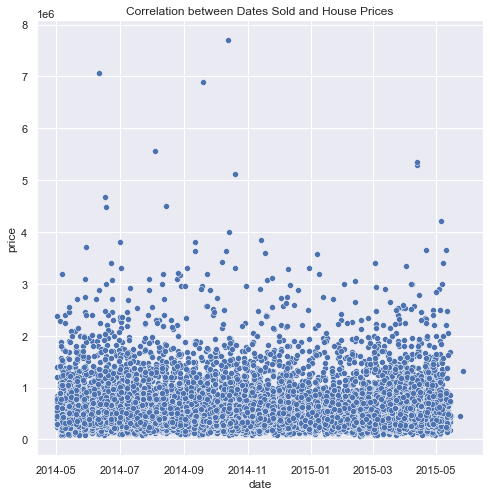

In [9]:
sns.set(rc = {"figure.figsize" : (8, 8)})
# We do not need such a big illustration now, smaller plots are easier to manage
import datetime as dt
dfi["date"] = pd.to_datetime(dfi["date"])
# Change date to a datetime variable so that the plot can interpret it
sns.scatterplot(dfi["date"], dfi["price"]).set(title = "Correlation between Dates Sold and House Prices")
dfi["date"]= dfi["date"].map(dt.datetime.toordinal)
# Change to numerical data so that the models can interpret it


There seems to be no noteworthy contribution of date to price, so we needn't include it.

Yr_renovated will include a lot of zeros for houses that haven't yet been renovated - that may decrease the correlation coefficient. So let's see if there is indeed a relationship.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Correlation between Years Renovated and House Prices')]

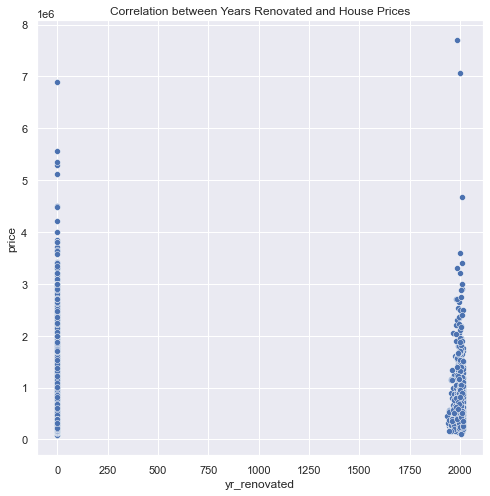

In [10]:
sns.scatterplot(dfi["yr_renovated"], dfi["price"]).set(title = "Correlation between Years Renovated and House Prices")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Correlation between Years Renovated and House Prices (for Renovated Units)')]

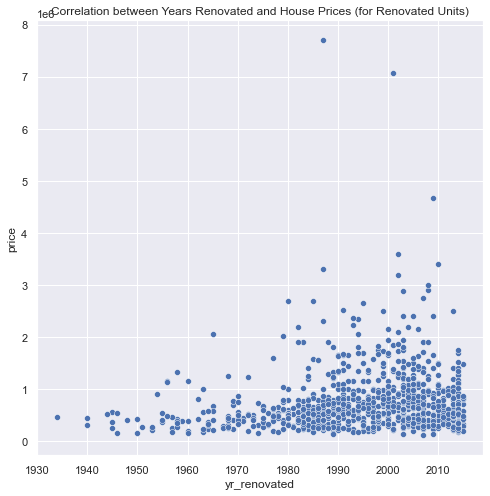

In [11]:
df2 = dfi[dfi.yr_renovated != 0]
# Take all the rows with the yr_renovated feature not being equal to 0
sns.scatterplot(df2["yr_renovated"], df2["price"]).set(title = "Correlation between Years Renovated and House Prices (for Renovated Units)")

There is indeed a useful relationship, it can contribute to the prediction to some extent, we may try it out.

The latitude and longitude attributes define the location of the house together. By mapping the price levels in accordance with location, we may detect vital nuances shaping the price.

[Text(0.5, 1.0, 'Correlation between Location and House Prices')]

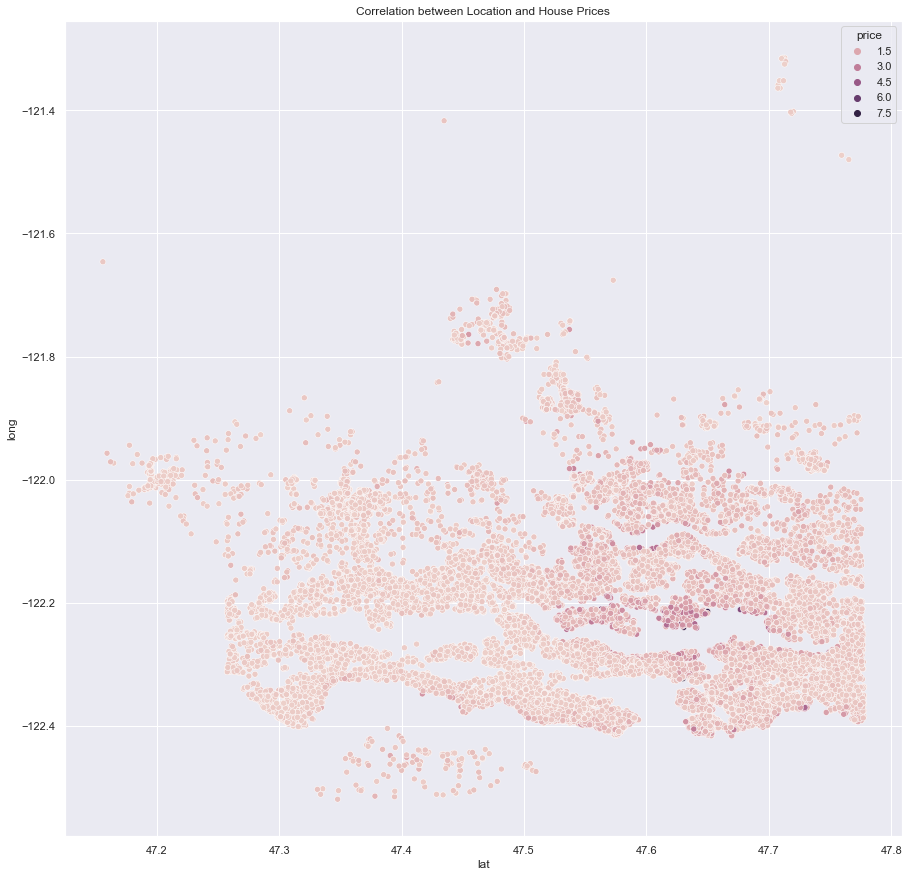

In [12]:
sns.set(rc = {"figure.figsize" : (15, 15)})
sns.scatterplot(data = dfi, x = dfi["lat"], y = dfi["long"], hue = dfi["price"]).set(title = "Correlation between Location and House Prices")

The only considerable outlier when it comes to price density is a red hue around 47°37'48.0"N 122°15'00.0"W. When we see a geographic map, we can identify the area as one bordering Lake Washington (check: https://www.google.com/maps/place/47%C2%B037'48.0%22N+122%C2%B015'00.0%22W/@47.624125,-122.2854477,13.2z/data=!4m5!3m4!1s0x0:0x1a3ac15217024dc6!8m2!3d47.63!4d-122.25). So we can refer to the waterfront attribute, and as the dense area starts to appear in greater latitude, keep that (it already has a good correlation).

Some of the features in the dataset, including waterfront, aren't continuous, rather categorized into smaller amounts of sets. Thus, they may give out a smaller coefficient of correlation even when they are very much related (and scatterplots are made up of lines that are hard to read) - though they do somewhat give us a hint, so we will be biased according to the matrix when picking. So, let's visualize them in relation to price using box-and-whisker plots, which draw boxes in the densest data clots and represent outliers with small points (whiskers) - we can interpret linear relation according to the boxes.

[Text(0.5, 1.0, 'Correlation between Whether the Unit is Waterfront and House Prices')]

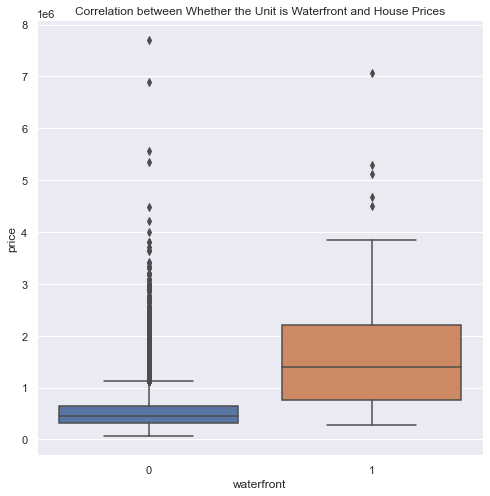

In [13]:
sns.set(rc = {"figure.figsize" : (8, 8)})
sns.boxplot(x = dfi["waterfront"], y = dfi["price"]).set(title = "Correlation between Whether the Unit is Waterfront and House Prices")

Waterfront, as expected, has something close to a direct positive relation with price, so is usable.

[Text(0.5, 1.0, 'Correlation between the Number of Bedrooms and House Prices')]

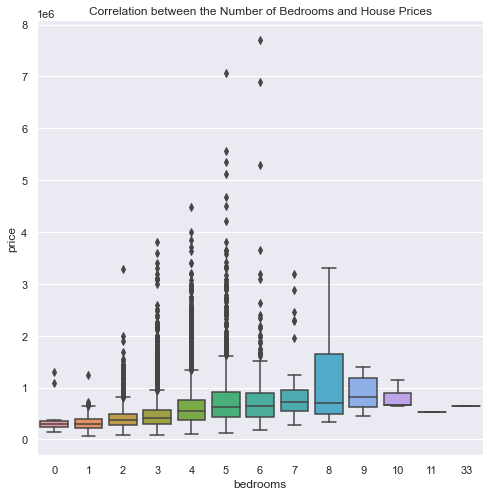

In [14]:
sns.boxplot(x = dfi["bedrooms"], y = dfi["price"]).set(title = "Correlation between the Number of Bedrooms and House Prices")

Bedrooms also have a rather strong positive relationship.

[Text(0.5, 1.0, 'Correlation between the Number of Bathrooms and House Prices')]

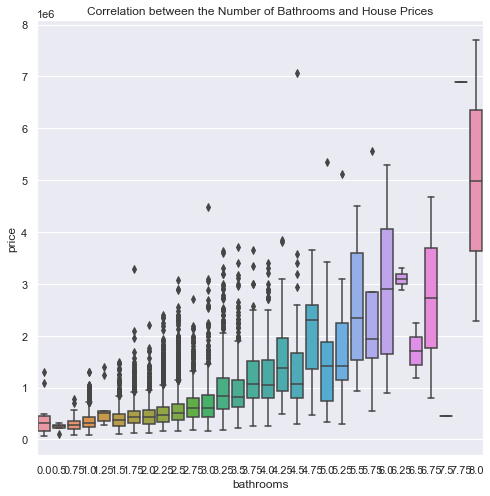

In [15]:
sns.boxplot(x = dfi["bathrooms"], y = dfi["price"]).set(title = "Correlation between the Number of Bathrooms and House Prices")

There seems to be a relation of higher order, though the linear correlation is strong enough, too.

[Text(0.5, 1.0, 'Correlation between the Number of Floors and House Prices')]

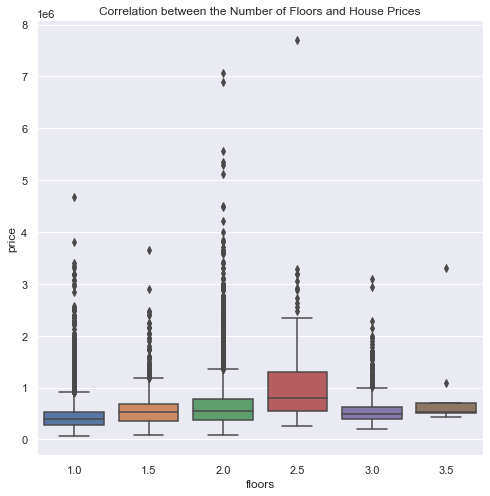

In [16]:
sns.boxplot(x = dfi["floors"], y = dfi["price"]).set(title = "Correlation between the Number of Floors and House Prices")

Good correlation until 2.5, the decrease in 3.0 may be attributed to the less data in the category and 3.0 and 3.5 still show a positive trend. We may include that as well.

[Text(0.5, 1.0, 'Correlation between the Rating of View and House Prices')]

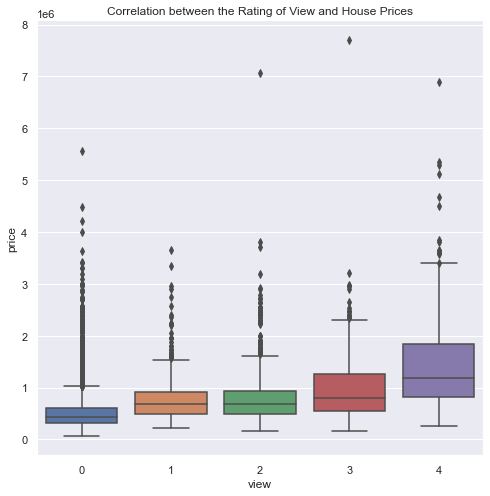

In [17]:
sns.boxplot(x = dfi["view"], y = dfi["price"]).set(title = "Correlation between the Rating of View and House Prices")

Another clear relation, will use.

[Text(0.5, 1.0, 'Correlation between the Rating of Condition and House Prices')]

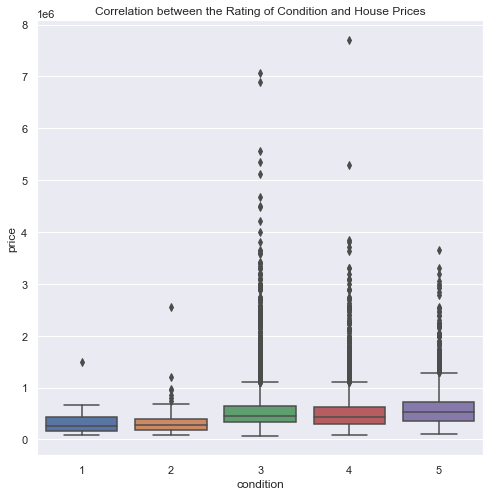

In [18]:
sns.boxplot(x = dfi["condition"], y = dfi["price"]).set(title = "Correlation between the Rating of Condition and House Prices")

No important trend except for the increase from 2 to 3, otherwise stable, not a large contributor.

## Creating a Model

In [19]:
X = dfi[["sqft_living15", "sqft_above", "grade", "sqft_living", "bathrooms", "bedrooms", "waterfront", "view", "lat", "yr_renovated", "sqft_basement", "floors"]]
y = dfi[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

We store the columns of the chosen features (via matrix and plot inspection above) in an "X" variable and the price column in a "y" one. We seperate the data rows under the columns into train and test sets, approximately 80 and 20% of all the data, respectively - we define a random state to eliminate the variability of different runs.

We form a linear regression model, "model", and activate normalization, to fit the attributes within a certain scale. Thereby, we will avoid size of features to interfere with the extent of their impact.

Then, we make the model best fit to the training sets (make it best predict y_train using X_train).

## Model Evaluation

### R2 Score

In [20]:
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    print("Predicted:", y_pred[i][0], "| Actual:", y_test.values[i][0])
# We print out the prdiction of the model using the X_test set vs the corresponding y_test element - we will use them to calculate the r2_score (look below).

Predicted: 431751.7906059325 | Actual: 365000.0
Predicted: 754069.8194960505 | Actual: 865000.0
Predicted: 1222684.9522968866 | Actual: 1038000.0
Predicted: 1567678.8576736823 | Actual: 1490000.0
Predicted: 777296.394853197 | Actual: 711000.0
Predicted: 264780.8142744377 | Actual: 211000.0
Predicted: 778255.448088929 | Actual: 790000.0
Predicted: 496471.3194960505 | Actual: 680000.0
Predicted: 423377.7292732559 | Actual: 384500.0
Predicted: 334882.1857926026 | Actual: 605000.0
Predicted: 533928.5802706815 | Actual: 638000.0
Predicted: 717209.5694960505 | Actual: 385000.0
Predicted: 334471.9977449812 | Actual: 175000.0
Predicted: 418266.8410453126 | Actual: 365000.0
Predicted: 306730.3481995128 | Actual: 160000.0
Predicted: 1126466.4967122152 | Actual: 1070000.0
Predicted: 308523.42914009467 | Actual: 800000.0
Predicted: 1198984.5694960505 | Actual: 795127.0
Predicted: 424494.6921626255 | Actual: 355000.0
Predicted: 638548.8194960505 | Actual: 474000.0
Predicted: 498264.3194960505 | Act

In [21]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.6642967444458963


The R2 score is a kind of measure of performance for regression models, comparing the predicted and real values. It can vary up to 1, or 100%, with the higher the score meaning better aptitude.

#### A Quicker Way

In [22]:
model.score(X_test, y_test)
# No need for y_pred, etc.

0.6642967444458963

## Model Enhancement

#### Different Feature Selection Methods

Different approaches to our feature selection algorithms may alter, or improve our model's performance. Up to this point, we used the filter method, examining the features according to their relevance. Let's use a wrapper and an embedded method to examine features according to their impact on the model.

##### Wrapper: Backward Elimination

In [23]:
dfa = np.array(dfi.drop(["price"], axis = 1))
# We will need the x-value to be an array anyway, we may as well perform the dropping on an array
x2 = dfa
y2 = dfi["price"]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)
model_2 = LinearRegression(normalize = True)
model_2.fit(x2_train, y2_train)
y2_pred = model_2.predict(x2_test)
print(r2_score(y2_test, y2_pred))
# We ought to check the initial situation to compare
import statsmodels.regression.linear_model as sm
x2 = np.append(arr = np.ones((21613, 1)).astype(int), values = x2, axis = 1)
# Appending a column of ones to act as the constant term of the multiple linear regression equation this method uses
x_opt = x2[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
# x_opt will be the collection of attributes that will prove optimal for the model
ols = sm.OLS(endog = y2, exog = x_opt).fit()
ols.summary()
# print out the ordinary least squares model data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.7023008745900667


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2666.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:58:52   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21593   BIC:                         5.893e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.907e+07    9.4e+06     -8.409      0.000   -9.75e+07   -6.06e+07
x1         -1.314e-06   4.81e-07     -2.730      0.006   -2.26e-06   -3.71e-07
x2           116.7126     12.127      9.624      0.000      92.943     140.482
x3         -3.588e+04   1887.610    -19.006      0.000   -3.96e+04   -3.22e+04
x4          4.138e+04   3246.423     12.747      0.000     3.5e+04    4.77e+04
x5           110.3843      2.265     48.744      0.000     105.946     114.823
x6             0.1188      0.048      2.481      0.013       0.025       0.213
x7          7235.2631   3588.188      2.016      0.044     202.150    1.43e+04
x8          5.822e+05   1.73e+04     33.614      0.000    5.48e+05    6.16e+05
x9          5.276e+04   2136.249     24.699      0.000    4.86e+04     5.7e+04
x10          2.76e+04   2350.852     11.742      0.000     2.3e+04    3.22e+04
x11         9.635e+04   2148.676     44.844      0.000    9.21e+04    1.01e+05
x12           70.5342      2.249     31.367      0.000      66.127      74.942
x13           39.8393      2.641     15.087      0.000      34.664      45.015
x14        -2620.5024     72.499    -36.145      0.000   -2762.607   -2478.398
x15           20.6241      3.649      5.652      0.000      13.471      27.777
x16         -580.5566     32.912    -17.640      0.000    -645.066    -516.047
x17         6.049e+05   1.07e+04     56.453      0.000    5.84e+05    6.26e+05
x18        -2.117e+05   1.31e+04    -16.127      0.000   -2.37e+05   -1.86e+05
x19           21.8985      3.440      6.366      0.000      15.156      28.641
x20           -0.3966      0.073     -5.412      0.000      -0.540      -0.253
==============================================================================
Omnibus:                    18440.898   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1908030.635
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      48.470   Cond. No.                     3.22e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.09e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In backward elimination, we use a certain metric called the p value, which measures the susceptibility of that finding or correlative advantage being of random error. Usually, you eliminate the attribute with the highest p value (you can check on the table above), though in my most recent run, there are no significantly great p values, so the original model may remain.

##### Embedded: L1 Lasso

In [24]:
df3 = dfi.head(1000)
# Taking the first 1000 rows to examine, as all of them would require a much greater memory and time
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
dfb = np.array(df3.drop(["price"], axis = 1))
x3 = dfb
y3 = df3["price"]

log = LogisticRegression(penalty = "l1", solver = "liblinear", random_state = 42, n_jobs = -1)
#  An estimator to penalize non-important attributes by decreasing coefficients (or even making them 0, thereby eliminating the term)

model_3 = SelectFromModel(estimator = log).fit(x3, y3)
# Selecting relevant attributes for the (x3, y3) pair using the estimator defined above

x4 = model_3.transform(x3)

print(model_3.get_support())
# Printing whether attributes are selected (in column index order)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
x5 = np.array(dfi.drop("price", axis = 1))[:, [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
# According to the output of the block above, taking the selected indexes of the dataframe for x5
y5 = dfi["price"]
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.2, random_state = 42)
model_4 = LinearRegression(normalize = True)
model_4.fit(x5_train, y5_train)
y5_pred = model_4.predict(x5_test)
print(r2_score(y5_test, y5_pred))

0.6824586281886962


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Lasso l1 feature selection will reduce the coefficients of redundant features

#### Quantile Transform

In [26]:
def coef_var(x) :
    co_var = np.std(x) / np.mean(x) * 100
    return co_var
for r in columns :
    if coef_var(dfi[r]) > 30 :
        print(r + ":", coef_var(dfi[r]))

id: 62.80152104232117
price: 67.97384996837633
bathrooms: 36.41766986115479
sqft_living: 44.15691936333466
sqft_lot: 274.17516514928735
floors: 36.1355255001032
waterfront: 1147.1490401187627
view: 327.0544719884242
sqft_above: 46.302624166684005
sqft_basement: 151.81854929987713
yr_renovated: 475.8995284796206
sqft_living15: 34.50074694658792
sqft_lot15: 213.835946239801


In [27]:
from sklearn.preprocessing import QuantileTransformer
df4 = np.array(dfi)
qt = QuantileTransformer(output_distribution = "normal", random_state = 42)
# A transformer to switch to a gaussian distribution
df4 = qt.fit_transform(df4)
# Transform the array according to the transformer

df4 = pd.DataFrame(df4, columns = ["id", "date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])
# Turn back to DataFrame object so that we can use it on previous models
df4["grade"] = dfi["grade"]
df4["lat"] = dfi["lat"]
# Changing back these attributes helps the models, probably as variation is contributing to their relationship with price

for r in columns :
    if coef_var(df4[r]) > 30 :
        print(r + ":", coef_var(df4[r]))

bedrooms: 16844.79930315816
bathrooms: 7257.464043767351
sqft_living: 4071421.413006313
condition: 493.03223060941195
long: 248342.13675523503
sqft_living15: 2822788.123814337


We transform the data so that it has a gaussian distribution, an assumption by the methods we've used, so meeting that may help get us better results.

### Transformed Models

Use df4 instead of dfi as the dataset for the models to implement the quartiletransform.

#### Filter

In [28]:
x6 = df4[["sqft_living15", "sqft_above", "grade", "sqft_living", "bathrooms", "bedrooms", "waterfront", "view", "lat", "yr_renovated", "sqft_basement", "floors"]]
y6 = df4[["price"]]
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.2, random_state = 42)
model_5 = LinearRegression(normalize = True)
model_5.fit(x6_train, y6_train)
y6_pred = model_5.predict(x6_test)
print(r2_score(y6_test, y6_pred))

0.735408883464169


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


#### Backward Elimination

In [29]:
dfa2 = np.array(df4.drop(["price"], axis = 1))
x7 = dfa
y7 = df4["price"]
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size = 0.2, random_state = 42)
model_6 = LinearRegression(normalize = True)
model_6.fit(x7_train, y7_train)
y7_pred = model_6.predict(x7_test)
print(r2_score(y7_test, y7_pred))
import statsmodels.regression.linear_model as sm
x7 = np.append(arr = np.ones((21613, 1)).astype(int), values = x7, axis = 1)
x_opt = x7[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ols = sm.OLS(endog = y7, exog = x_opt).fit()
ols.summary()

0.752457987561114


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3503.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:02:01   Log-Likelihood:                -15462.
No. Observations:               21613   AIC:                         3.096e+04
Df Residuals:                   21593   BIC:                         3.112e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -325.0270     23.184    -14.020      0.000    -370.469    -279.585
x1          2.802e-12   1.19e-12      2.360      0.018    4.75e-13    5.13e-12
x2             0.0004   2.99e-05     12.567      0.000       0.000       0.000
x3            -0.0075      0.005     -1.616      0.106      -0.017       0.002
x4             0.1356      0.008     16.935      0.000       0.120       0.151
x5             0.0002   5.58e-06     27.617      0.000       0.000       0.000
x6          9.879e-07   1.18e-07      8.368      0.000    7.57e-07    1.22e-06
x7             0.1681      0.009     19.003      0.000       0.151       0.185
x8             0.5111      0.043     11.969      0.000       0.427       0.595
x9             0.1002      0.005     19.021      0.000       0.090       0.111
x10            0.1291      0.006     22.281      0.000       0.118       0.141
x11            0.2974      0.005     56.145      0.000       0.287       0.308
x12         4.972e-05   5.54e-06      8.969      0.000    3.89e-05    6.06e-05
x13            0.0001   6.51e-06     16.040      0.000    9.17e-05       0.000
x14           -0.0060      0.000    -33.822      0.000      -0.006      -0.006
x15         7.357e-05      9e-06      8.177      0.000    5.59e-05    9.12e-05
x16           -0.0011   8.11e-05    -13.355      0.000      -0.001      -0.001
x17            2.8398      0.026    107.497      0.000       2.788       2.892
x18           -0.2262      0.032     -6.992      0.000      -0.290      -0.163
x19            0.0002   8.48e-06     24.497      0.000       0.000       0.000
x20        -3.335e-07   1.81e-07     -1.846      0.065   -6.88e-07    2.07e-08
==============================================================================
Omnibus:                      614.159   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              985.812
Skew:                          -0.271   Prob(JB):                    8.58e-215
Kurtosis:                       3.894   Cond. No.                     3.22e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.09e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### L1 Lasso

In [30]:
x10 = np.array(df4.drop("price", axis = 1))[:, [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]] # .drop("date", axis = 1).drop("price", axis = 1))[:, [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
y10 = df4["price"]
x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size = 0.2, random_state = 42)
model_7 = LinearRegression(normalize = True)
model_7.fit(x10_train, y10_train)
y10_pred = model_7.predict(x10_test)
print(r2_score(y10_test, y10_pred))

0.7621073258846905


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
